####  电影分析
    1) 电影评分总体趋势
    2) 评分最高和最低的N部电影
    3) 按年份分析电影评分
    4) 按年份统计电影数量

In [60]:
#  导入相关数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['PingFang SC']
mpl.rcParams['font.serif'] = ['PingFang SC']
sns.set_style('darkgrid', {'font.sans-serif':['PingFang SC', 'Droid Sans Fallback']})

In [3]:
#  导入数据
fpath = '/Users/yangsan/练习/data.csv'
df = pd.read_csv(fpath)
df

,mId,mName,mYear,mDirects,mActors,mTags,mCountry,mLength,mScore,mVotes,mAlias,mSummary,mPoster
0,4920389,头号玩家,2018.0,史蒂文·斯皮尔伯格,泰伊·谢里丹/奥利维亚·库克/本·门德尔森/马克·里朗斯/丽娜·维特/森崎温/赵家正/西蒙·...,动作/科幻/冒险,美国,140分钟,8.7,489756.0,玩家一号/挑战者1号(港)/一级玩家(台)/一号玩家,故事发生在2045年，虚拟现实技术已经渗透到了人类生活的每一个角落。詹姆斯哈利迪（马克·里朗...,https://img1.doubanio.com/view/photo/s_ratio_p...
1,27133303,超时空同居,2018.0,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...
2,25849049,超人总动员2,2018.0,布拉德·伯德,格雷格·T·尼尔森/霍利·亨特/莎拉·沃威尔/赫克·米尔纳/伊莱·富西尔/凯瑟琳·基纳/塞缪...,喜剧/动作/动画/冒险,美国,118分钟 / 126分钟(中国大陆),8.1,80332.0,超人特攻队2(台)/超人特工队2(港)/超人家族2,超人家族时隔14年强势回归！这次站在聚光灯下的是弹力女超人海伦（霍利·亨特 配音），超能先生...,https://img3.doubanio.com/view/photo/s_ratio_p...
3,26366496,邪不压正,2018.0,姜文,彭于晏/廖凡/姜文/周韵/许晴/泽田谦也/安地/史航/李梦/丁嘉丽/陈曦,剧情/喜剧/动作,中国大陆,137分钟,7.1,197676.0,侠隐/Hidden Man,七七事变前夕，华裔青年小亨德勒（彭于晏 饰）从美国远赴重洋，回到阔别十数年之久的北平从医。然...,https://img3.doubanio.com/view/photo/s_ratio_p...
4,26925317,动物世界,2018.0,韩延,李易峰/迈克尔·道格拉斯/周冬雨/曹炳琨/王戈/苏可,剧情/动作/冒险,中国大陆,132分钟,7.3,137144.0,赌博默示录中国版/Animal World,在游戏机厅做着兼职“小丑”的郑开司（李易峰 饰），幼时父亲突然失踪，母亲重病住院，使得郑开司...,https://img1.doubanio.com/view/photo/s_ratio_p...
5,25977027,小姐,2016.0,朴赞郁,金敏喜/金泰梨/河正宇/赵震雄/金海淑/文素丽,剧情/悬疑/同性,韩国,145分钟 / 168分钟(加长版),8.0,126086.0,下女诱罪(港)/下女的诱惑(台)/指匠情挑/The Handmaiden,公爵（河正宇 饰）为了得到日本贵族秀子小姐（金敏喜 饰）的财产，意欲娶她为妻，而后以其患上精...,https://img3.doubanio.com/view/photo/s_ratio_p...
6,1450031,启示,2006.0,梅尔·吉布森,鲁迪·杨布拉德/达利娅·埃尔南德斯/乔纳森·布雷维尔/莫里斯·博德耶洛海德/劳尔·特鲁希洛/...,剧情/动作/冒险,美国,139分钟,8.5,48396.0,启示录/阿波卡猎逃(台)/毁天灭地,玛雅文明末期，奢华淫靡之气蔓延，为了祭奠那些刚刚落成的金字塔以及驱散众神的愤怒，玛雅王国派出...,https://img3.doubanio.com/view/photo/s_ratio_p...
7,1466007,寂静岭,2006.0,克里斯多夫·甘斯,拉达·米切尔/肖恩·宾/劳瑞·侯登/黛博拉·卡拉·安格/金·寇兹/谭雅·艾伦/艾丽丝·克里奇...,悬疑/恐怖,加拿大 / 法国 / 日本 / 美国,125 分钟,7.5,155106.0,沉默之丘(台)/鬼魅山房(港)/哑巴山,为了女儿，Rose（拉达•米契尔 饰）与女儿一起来到了一个奇怪的地方。 女儿常常梦游，Ros...,https://img1.doubanio.com/view/photo/s_ratio_p...
8,1433360,雏菊,2006.0,刘伟强,全智贤/郑雨盛/李成宰/姜大卫/林迪安,剧情/爱情,韩国 / 香港,110分钟 / 124分钟(导演剪辑版),8.0,188428.0,爱无间/黛西/Daisy,阿姆斯特丹，两个男人爱上了同一个女人，注定了一段纠缠的故事。惠瑛（全智贤饰）是画家，每天到广...,https://img3.doubanio.com/view/photo/s_ratio_p...
9,1767042,潘神的迷宫,2006.0,吉尔莫·德尔·托罗,伊万娜·巴克罗/塞尔希·洛佩斯/玛丽维尔·贝尔杜/道格·琼斯/阿里亚德娜·希尔,剧情/悬疑/战争/奇幻,西班牙 / 墨西哥 / 美国,118分钟(英国) / 112分钟(多伦多电影节),7.8,135444.0,潘的迷宫/羊男的迷宫/魔间迷宫/奇幻迷宫/Pan's Labyrinth,12岁女孩子奥菲丽娅（伊万娜•巴克尔洛 饰）有一个凶暴的法西斯军官继父维达（塞吉•洛佩兹 饰...,https://img3.doubanio.com/view/photo/s_ratio_p...


In [3]:
#  电影评分总体分布
df.mScore.isna().any()  # 判断是否有缺失值

True

In [4]:
sdata = df.dropna(subset=['mScore'])  # 删除缺失值

In [5]:
len(df), len(sdata)

(27688, 24453)

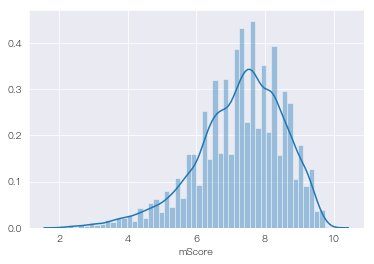

In [8]:
sns.distplot(sdata['mScore'])

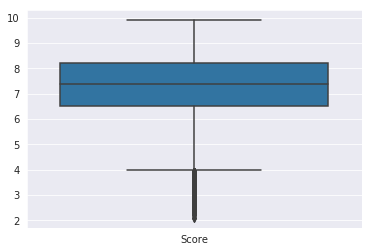

In [9]:
sns.boxplot(x=['Score'], y=[sdata.mScore])

In [13]:
#  评价最高和最低的10部电影
r = sdata.sort_values('mScore', ascending=False)
print(r[:10].mName.values)
print(r[-10:].mName.values)

['地球脉动 第二季' '蓝色星球2' '猎捕' '瑞克和莫蒂 第二季' '是，首相  第二季' '老友记 第十季' '瑞克和莫蒂 第三季'
 '乔治哈里森纪念演唱会' '瑞克和莫蒂 第一季' '冰冻星球']
['恐怖电影院2' '惊魂七夜' '怨灵宿舍之人偶老师' '失恋399年' '夜闯寡妇村' '汽车人总动员' '世博总动员' '新木偶奇遇记'
 '嫁给大山的女人' '纯洁心灵·逐梦演艺圈']


In [14]:
#  评价人数最多和最少的10部电影
r = sdata.sort_values('mVotes', ascending=False)
print(r[:10].mName.values)
print(r[-10:].mName.values)

['肖申克的救赎' '这个杀手不太冷' '阿甘正传' '三傻大闹宝莱坞' '千与千寻' '泰坦尼克号' '霸王别姬' '海上钢琴师' '怦然心动'
 '当幸福来敲门']
['姐妹' '缅因海' '跳跃的爱情' '2011年体育画报泳装秀写真' '忍武者' '超时空漫游' '北投最后一班列车'
 '超兽机神断空我·GOD BLESS DANCOUGA' '平民王子' '惠特妮·休斯顿：我们会永远爱你']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text xticklabel objects>)

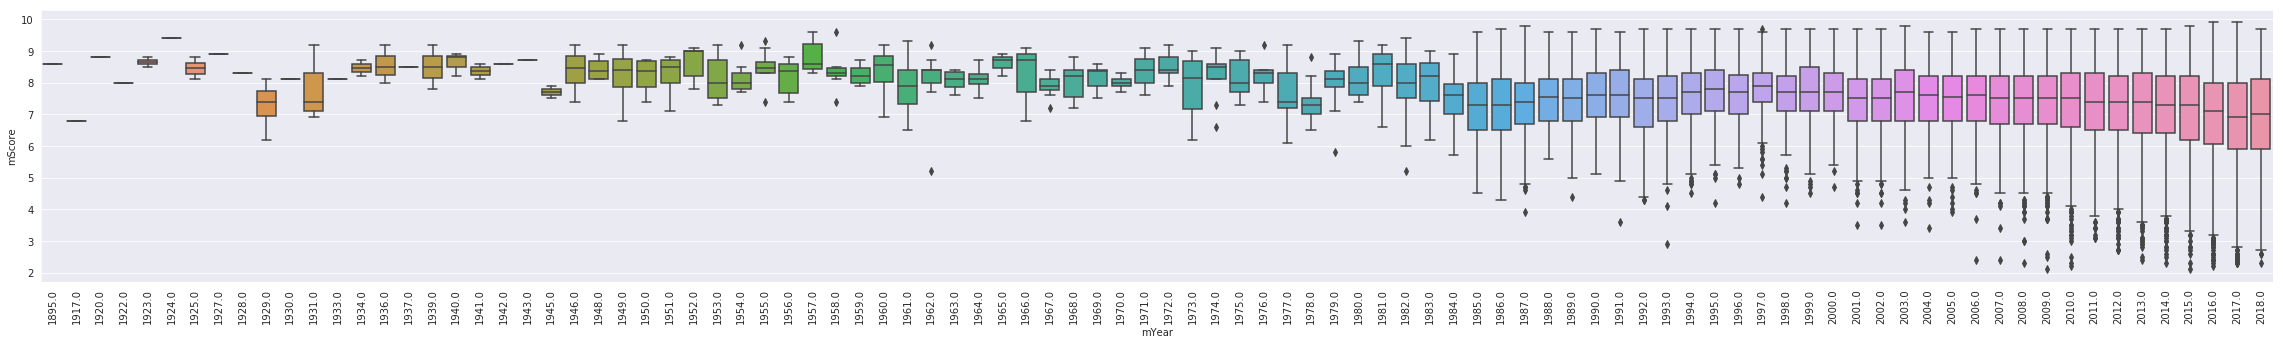

In [16]:
#  按年进行电影评分分析
plt.figure(figsize=(40, 5))
sns.boxplot(x='mYear', y='mScore', data=sdata)
plt.xticks(rotation=90)

In [6]:
#  对数据进行清洗，只保留1985-2018年的电影
sdata = sdata.dropna(subset=['mYear'])
sdata.mYear = sdata.mYear.astype('i')  # 更改数据类型
sdata = sdata[sdata.mYear>1984]
len(sdata)

24029

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

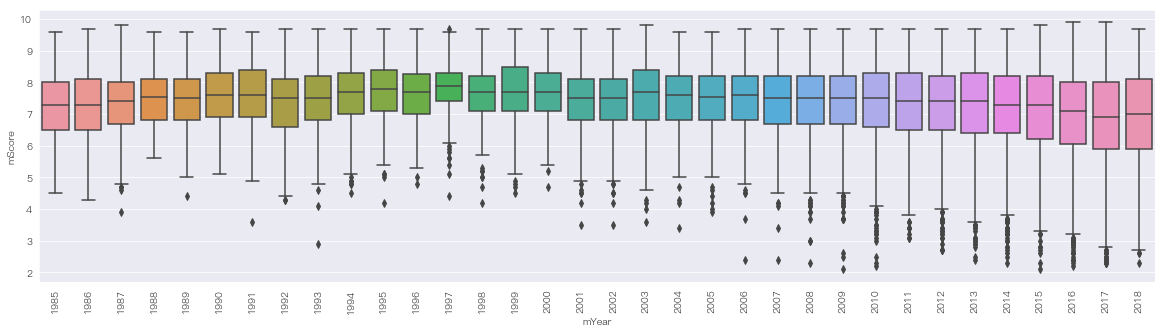

In [10]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='mYear', y='mScore', data=sdata)
plt.xticks(rotation=90)

In [22]:
#  按年分统计电影数据
r = sdata.mYear.value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

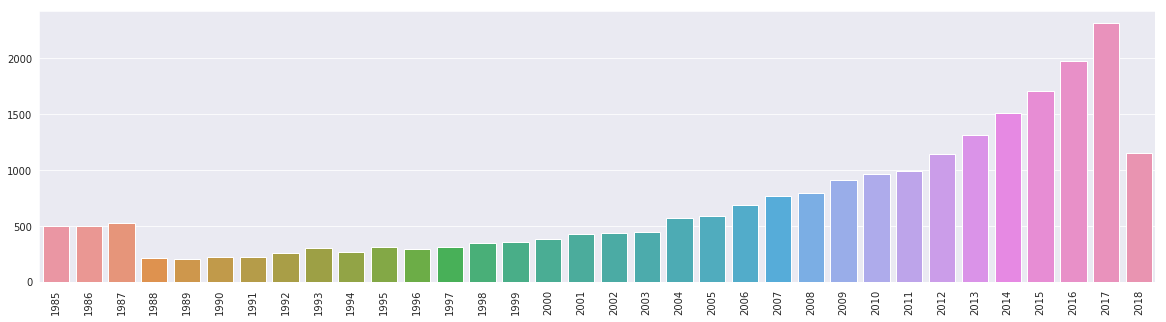

In [24]:
plt.figure(figsize=(20, 5))
sns.barplot(r.index.values, r.values)
plt.xticks(rotation=90)

In [29]:
result = sdata.groupby('mYear')  # 按年分组
r = result.mScore.agg(['mean', max, min])
r

,mean,max,min
mYear,,,
1985,7.296600,9.6,4.5
1986,7.286454,9.7,4.3
1987,7.340454,9.8,3.9
1988,7.483486,9.6,5.6
1989,7.439048,9.6,4.4
1990,7.587773,9.7,5.1
1991,7.582969,9.6,3.6
1992,7.370543,9.7,4.3
1993,7.473597,9.7,2.9


In [30]:
xindex = result.size().index.values

In [34]:
meandata = r['mean']
maxdata = r[max]
mindata = r[min]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

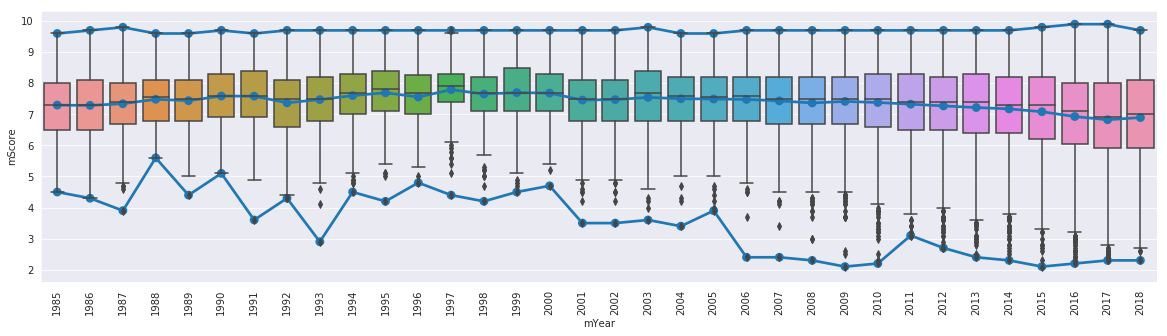

In [37]:
plt.figure(figsize=(20, 5))
for col in r.columns:
    sns.pointplot(xindex, r[col])
sns.boxplot(x='mYear', y='mScore', data=sdata)
plt.xticks(rotation=90)

In [33]:
#  使用pyecharts分析电影数据
from pyecharts import Overlap, Line, Bar

In [15]:
result = sdata.groupby('mYear')
tmp = result.size()
r = result.agg(['mean', max, min])

In [62]:
def get_vals(sobj):
    return sobj.index.values, sobj.values

In [17]:
xindex, vals = get_vals(tmp)
xindex, vals

(array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
        1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018]),
 array([ 500,  502,  529,  218,  210,  229,  229,  258,  303,  275,  311,
         299,  319,  347,  362,  383,  435,  442,  453,  578,  588,  687,
         774,  802,  914,  967,  993, 1142, 1319, 1510, 1708, 1975, 2313,
        1155]))

In [11]:
bar = Bar('年份与数量')
bar.add('', xindex, vals)
bar

In [58]:
result = sdata.groupby('mYear')
tmp = result.size()
r = result.mScore.agg(['mean', max, min])
xindex, vals = get_vals(tmp)

over = Overlap()
bar = Bar()
bar.add('数量', xindex, vals)
over.add(bar)
lcolors = (x for x in ['blue', 'green', 'black'])  # 生成器
for col in r.columns:
    line = Line()
    line.add(col, xindex, r[col], line_color=next(lcolors))
    over.add(line)
over.add(line, yaxis_index=1, is_add_yaxis=True)
over

In [28]:
#  按国家和地区分组统计
result = sdata.groupby('mCountry')
tmp = result.size()
tmp.sort_values(ascending=False)

mCountry
美国                                     5463
日本                                     4383
中国大陆                                   3594
香港                                     1514
韩国                                     1390
英国                                     1225
法国                                      559
台湾                                      439
中国大陆 / 香港                               221
德国                                      190
泰国                                      185
英国 / 美国                                 180
美国 / 英国                                 160
加拿大                                     153
西班牙                                     138
美国 / 德国                                 130
印度                                      126
意大利                                     115
俄罗斯                                     112
美国 / 加拿大                                110
香港 / 中国大陆                               107
澳大利亚                                     94
中国                     

In [29]:
#  数据处理，只保留前8个国家
result = sdata.groupby('mCountry')
tmp = result.size()
tmp = tmp.sort_values(ascending=False)
tmp = tmp[:8]

In [30]:
from pyecharts import Bar

In [31]:
xindex, vals = get_vals(tmp)
bar = Bar('电影的国家和地区')
bar.add('', xindex, vals)
bar

In [8]:
#  数量最多的8个国家，年份与评论分析
result = sdata.groupby('mCountry')
tmp = result.size()
tmp = tmp.sort_values(ascending=False)
tmp = tmp[:8]

In [9]:
cdata = sdata[sdata.mCountry.isin(tmp.index.values)]
len(cdata), len(sdata)

(18567, 24029)

In [34]:
sum(tmp.values)

18567

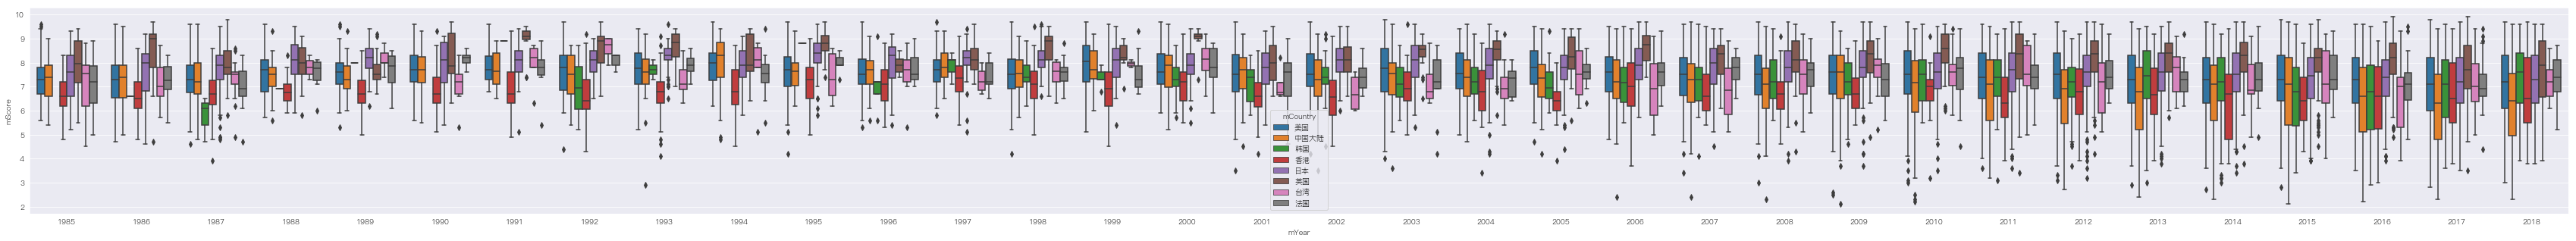

In [35]:
plt.figure(figsize=(60, 5))
sns.boxplot(x='mYear', y='mScore', hue='mCountry', data=cdata)

In [36]:
#  国家和地区，年份，数量，平分均值统计
result = {}
for c in xindex:
    tmp = cdata[cdata.mCountry==c].groupby('mYear')
    tmp = tmp.mScore.agg(['count', 'mean'])
    result[c] = tmp
result

{'美国':        count      mean
 mYear                 
 1985     122  7.355738
 1986     110  7.205455
 1987     123  7.320325
 1988      53  7.547170
 1989      50  7.524000
 1990      49  7.763265
 1991      42  7.797619
 1992      51  7.613725
 1993      82  7.667073
 1994      59  7.920339
 1995      71  7.573239
 1996      75  7.562667
 1997      76  7.709211
 1998      83  7.543373
 1999      84  7.903571
 2000      71  7.756338
 2001     104  7.500962
 2002      78  7.601282
 2003     104  7.666346
 2004     102  7.588235
 2005     125  7.756000
 2006     148  7.484459
 2007     198  7.386869
 2008     203  7.400000
 2009     236  7.465254
 2010     244  7.466803
 2011     255  7.384314
 2012     285  7.444912
 2013     304  7.222697
 2014     339  7.236283
 2015     348  7.271264
 2016     398  7.171106
 2017     531  7.042750
 2018     260  7.057308, '日本':        count      mean
 mYear                 
 1985      63  7.468254
 1986      78  7.580769
 1987      89  7.689888
 198

In [37]:
from pyecharts import Line
line = Line('数量统计')
for key in xindex:
    tmp = result[key]
    x,y = get_vals(tmp['count'])
    line.add(key, x, y)
line

In [38]:
#  中国电影口碑分析
#  1：口碑最好的最差的N部电影
#  2：评分低于5分，认为烂片，每年统计数据

In [10]:
#  找出所有中国电影数据
chinamovie = cdata[cdata['mCountry'].isin(['中国大陆','香港','台湾'])]
chinamovie

,mId,mName,mYear,mDirects,mActors,mTags,mCountry,mLength,mScore,mVotes,mAlias,mSummary,mPoster
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...
3,26366496,邪不压正,2018,姜文,彭于晏/廖凡/姜文/周韵/许晴/泽田谦也/安地/史航/李梦/丁嘉丽/陈曦,剧情/喜剧/动作,中国大陆,137分钟,7.1,197676.0,侠隐/Hidden Man,七七事变前夕，华裔青年小亨德勒（彭于晏 饰）从美国远赴重洋，回到阔别十数年之久的北平从医。然...,https://img3.doubanio.com/view/photo/s_ratio_p...
4,26925317,动物世界,2018,韩延,李易峰/迈克尔·道格拉斯/周冬雨/曹炳琨/王戈/苏可,剧情/动作/冒险,中国大陆,132分钟,7.3,137144.0,赌博默示录中国版/Animal World,在游戏机厅做着兼职“小丑”的郑开司（李易峰 饰），幼时父亲突然失踪，母亲重病住院，使得郑开司...,https://img1.doubanio.com/view/photo/s_ratio_p...
11,26630781,我不是潘金莲,2016,冯小刚,范冰冰/郭涛/大鹏/张嘉译/于和伟/张译/李宗翰/赵立新/田小洁/范伟/高明/刘桦/黄建新/李晨,剧情/喜剧,中国大陆,140分钟,6.7,169236.0,我是李雪莲/我叫李雪莲/I Am Not Madame Bovary,一个普通的农村妇女李雪莲（范冰冰 饰），为了纠正一句话，与上上下下、方方面面打了十年交道。打...,https://img3.doubanio.com/view/photo/s_ratio_p...
12,2375707,神雕侠侣,2006,于敏,刘亦菲/黄晓明/陈紫函/杨幂/叮当/王洛勇/赵鸿飞/钱博/孟广美/于承惠/陈继铭/翟乃社/孔...,动作/爱情/奇幻/冒险,中国大陆,NaN,6.9,20704.0,NaN,南宋末年，赤练仙子李莫愁（孟广美 饰）在江南一带找昔日恋人陆展元（胡东 饰）寻仇。大侠郭靖（...,https://img3.doubanio.com/view/photo/s_ratio_p...
13,1853160,狗咬狗,2006,郑保瑞,陈冠希/李灿森/裴唯莹/张兆辉/黎耀祥/林雪/林嘉华,剧情/动作/惊悚/犯罪,香港,109 分钟,8.0,45129.0,Dog Bite Dog,暗黑、摇晃的船舱，来自柬埔寨的杀手鹏（陈冠希 饰），狗一般在抢食已经洒在地上的残羹冷炙。甚至...,https://img3.doubanio.com/view/photo/s_ratio_p...
24,4097232,精灵世纪,2006,关心 / 林继东,成龙/李咏/林继东/边辉/姬他,剧情/爱情/科幻/动画/儿童/奇幻,中国大陆,NaN,9.3,2288.0,Wizard Century,长久以来，精灵国一直守护着关乎人类存亡的生命之源宝石。可是，邪恶的黑暗精灵觊觎宝石拥有的强大...,https://img3.doubanio.com/view/photo/s_ratio_p...
28,26290642,致青春·原来你还在这里,2016,周拓如,吴亦凡/刘亦菲/金世佳/李沁/李梦/郝劭文/陈燃/乔任梁,剧情/爱情,中国大陆,98分钟,4.1,80809.0,致青春2/原来你还在这里/致我们终将逝去的青春2/原来/Never Gone,外表温柔安静的苏韵锦（刘亦菲 饰）在高中同学程铮（吴亦凡 饰）的深情追求下慢慢爱上了对方，可...,https://img1.doubanio.com/view/photo/s_ratio_p...
32,3418557,三毛流浪记,2006,朱敏 / 王柏荣,NaN,动画/儿童,中国大陆,NaN,8.4,1705.0,NaN,三毛自幼失去了父母成为了无家可归的流浪儿，他日日风餐露宿孤苦伶仃，靠着捡烟头的零星收入维持生...,https://img3.doubanio.com/view/subject/m/publi...
34,26704590,一念无明,2016,黄进,曾志伟/余文乐/方皓玟/金燕玲/陈学文/麦子乐/吴肇轩/税瀞熙,剧情/家庭,香港,101分钟,7.9,58877.0,Mad World,患有躁郁症的阿东（余文乐 饰）因为当年误杀饱受痛症折磨的妈妈（金燕玲 饰）被判入住青山医院，...,https://img3.doubanio.com/view/photo/s_ratio_p...


In [40]:
result = chinamovie.sort_values('mScore')
print(result[:10].filter(items=['mName', 'mScore']))
print(result[-10:].filter(items=['mName', 'mScore']))

            mName  mScore
12097     嫁给大山的女人     2.1
12242  纯洁心灵·逐梦演艺圈     2.1
2460       新木偶奇遇记     2.2
10282       世博总动员     2.2
9026      向钱冲，向前冲     2.3
2654       恐怖电影院2     2.3
20345        惊魂七夜     2.3
2108    怨灵宿舍之人偶老师     2.3
1641       失恋399年     2.3
9464       新生活大爆炸     2.3
             mName  mScore
14991       毛骗 终结篇     9.6
1021        电影最TOP     9.6
20844   黄子华栋笃笑之冇炭用     9.6
657      急诊室故事 第二季     9.6
16532    一千零一夜 出走季     9.6
4395     天地风云录之九龙变     9.6
14781    非正式会谈 第二季     9.6
14291     大明王朝1566     9.7
17882  黄子华栋笃笑之金盘𠺘口     9.7
14929        最后的棒棒     9.7


In [42]:
#  烂片统计，低于5分认为烂片
badmv = chinamovie[chinamovie.mScore<5]
len(badmv)

603

In [62]:
tmp = badmv.groupby('mYear')
index, vals = get_vals(tmp.size())

In [64]:
from pyecharts import Bar
bar = Bar('差片统计')
bar.add('', index, vals, xaxis_rotate=90)
bar

In [65]:
#  显示每年，对于Nan值，填充0
index

array([1985, 1986, 1987, 1991, 1992, 1993, 1994, 1999, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [66]:
allcount = chinamovie.groupby('mYear').size()

In [67]:
badcount = badmv.groupby('mYear').size()
badcount

mYear
1985      2
1986      2
1987      4
1991      1
1992      2
1993      4
1994      5
1999      4
2001      3
2002      3
2003      1
2004      2
2005      2
2006      5
2007      3
2008      7
2009      9
2010     16
2011     20
2012     34
2013     43
2014     50
2015     67
2016    102
2017    134
2018     78
dtype: int64

In [72]:
tmp = pd.concat([badcount, allcount], axis=1)
tmp = tmp.fillna(0)
tmp = tmp[0]/tmp[1]
bar = Bar('差片占百分比')
index,vals = get_vals(tmp)
bar.add('', index, vals, xaxis_rotate=90)
bar

In [73]:
#  电影分类处理，一个电影分N种类型，比如： 喜剧，剧情，需要拆分统计，例如：
'''
美国 死侍 剧情/动作
美国 死侍 剧情
美国 死侍 动作
'''
#  思路：拆分列-> 拆分行-> 数据合并
#  知识点：str.split, reset_index, join
#  具体实现，使用2行数据进行操作，便于分析

'\n美国 死侍 剧情/动作\n美国 死侍 剧情\n美国 死侍 动作\n'

In [13]:
#  获取两行数据
tmp = chinamovie[:2]
tmp

,mId,mName,mYear,mDirects,mActors,mTags,mCountry,mLength,mScore,mVotes,mAlias,mSummary,mPoster
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...
3,26366496,邪不压正,2018,姜文,彭于晏/廖凡/姜文/周韵/许晴/泽田谦也/安地/史航/李梦/丁嘉丽/陈曦,剧情/喜剧/动作,中国大陆,137分钟,7.1,197676.0,侠隐/Hidden Man,七七事变前夕，华裔青年小亨德勒（彭于晏 饰）从美国远赴重洋，回到阔别十数年之久的北平从医。然...,https://img3.doubanio.com/view/photo/s_ratio_p...


In [14]:
#  拆分多列
tmp = tmp.mTags.str.split('/',expand=True)
tmp

,0,1,2
1,喜剧,爱情,奇幻
3,剧情,喜剧,动作


In [15]:
#  将列拆分行：
#  1 喜剧
#  2 爱情
#...
r = tmp.stack()

In [16]:
#  重置索引
r = r.reset_index(level=1)
r

,level_1,0
1,0,喜剧
1,1,爱情
1,2,奇幻
3,0,剧情
3,1,喜剧
3,2,动作


In [17]:
r = r.drop(columns='level_1')
r

,0
1,喜剧
1,爱情
1,奇幻
3,剧情
3,喜剧
3,动作


In [86]:
r = r.reset_index(level=1, drop=True)
r

1    喜剧
1    爱情
1    奇幻
3    剧情
3    喜剧
3    动作
dtype: object

In [88]:
r = r.to_frame()

In [18]:
r.columns = ['mType']
r

,mType
1,喜剧
1,爱情
1,奇幻
3,剧情
3,喜剧
3,动作


In [19]:
tmp = chinamovie[:2]
tmp = tmp.join(r)
tmp.filter(items=['mName','mYear', 'mTags', 'mType'])

,mName,mYear,mTags,mType
1,超时空同居,2018,喜剧/爱情/奇幻,喜剧
1,超时空同居,2018,喜剧/爱情/奇幻,爱情
1,超时空同居,2018,喜剧/爱情/奇幻,奇幻
3,邪不压正,2018,剧情/喜剧/动作,剧情
3,邪不压正,2018,剧情/喜剧/动作,喜剧
3,邪不压正,2018,剧情/喜剧/动作,动作


In [22]:
#  数据合并
def deal_data(data, colname, sp='/', rename='x'):
    tmp = data[colname].str.split(sp, expand=True)
    r = tmp.stack().reset_index(level=1, drop=True)
    r = r.to_frame()
    r.columns = [rename]
    r.dropna()
#     return data.join(r)
    result = data.join(r)
    return result.dropna(subset=[rename])
result = deal_data(chinamovie, 'mTags', rename='mType')

In [27]:
#  去除数量小于N的类型，根据类型分组，统计评分均值最高和最低的标签
gmv = result.groupby('mType')
tmp = gmv.size()
tmp = tmp[tmp.values>30]
vtype = tmp.index.values

In [28]:
result = result[result.mType.isin(vtype)]

In [31]:
#  根据不同各类型电影数量，评分均值，最大值，最小值
gmv = result.groupby('mType')
data = gmv.mScore.agg(['count', 'mean', max, min])

In [39]:
data = data.sort_values('count')
xindex = data.index.values

over = Overlap()
bar = Bar()
bar.add('数量', xindex, data['count'].values, xaxis_rotate=90)
over.add(bar)
lcolors = (x for x in ['blue', 'green', 'black'])  # 生成器
for col in ['mean', 'max', 'min']:
    line = Line()
    line.add(col, xindex, data[col], line_color=next(lcolors))
    over.add(line, yaxis_index=1, is_add_yaxis=True)
over

In [40]:
#  统计出导演和演员电影数量
# 1： 出演电影最多的N个演员
# 2： 口碑最差和最好的N个演员
# 3： 导演电影最多的N个导演
# 4： 口碑最好和最差的N个导演
def deal_data(data, colname, sp='/', rename='x'):
    tmp = data[colname].str.split(sp, expand=True)
    r = tmp.stack().reset_index(level=1, drop=True)
    r = r.to_frame()
    r.columns = [rename]
    r.dropna()
    result = data.join(r)
    return result.dropna(subset=[rename])
result = deal_data(chinamovie, 'mActors', rename='Actors')

In [41]:
len(result)

49770

In [45]:
#  数据清洗函数，演员演出量大于numlimit
def delDataBynum(data, group, numlimit=5):
    # 分组
    gmv = data.groupby(group)
    # 计算数量
    tmp = gmv.size()
    # 根据数量清洗数据
    tmp = tmp[tmp.values>numlimit]
    vtype = tmp.index.values
    # 对整个数据过滤
    result = data[data[group].isin(vtype)]
    return result
#  根据演员统计，演员演出电影数量超过10
dfactors = delDataBynum(result,'Actors',10)
dfactors

,mId,mName,mYear,mDirects,mActors,mTags,mCountry,mLength,mScore,mVotes,mAlias,mSummary,mPoster,Actors
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,雷佳音
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,佟丽娅
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,于和伟
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,陶虹
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,李光洁
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,范明
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,徐峥
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,杨迪
1,27133303,超时空同居,2018,苏伦,雷佳音/佟丽娅/张衣/于和伟/王正佳/陶虹/李念/李光洁/杨玏/范明/徐峥/杨迪/方龄/陈昊,喜剧/爱情/奇幻,中国大陆,101分钟,7.0,190427.0,口袋宇宙/How Long Will I Love U,生活在2018年的大龄女青年谷小焦（佟丽娅 饰），梦想能够嫁一个能买得起她幼时豪宅的有钱人，...,https://img1.doubanio.com/view/photo/s_ratio_p...,陈昊
3,26366496,邪不压正,2018,姜文,彭于晏/廖凡/姜文/周韵/许晴/泽田谦也/安地/史航/李梦/丁嘉丽/陈曦,剧情/喜剧/动作,中国大陆,137分钟,7.1,197676.0,侠隐/Hidden Man,七七事变前夕，华裔青年小亨德勒（彭于晏 饰）从美国远赴重洋，回到阔别十数年之久的北平从医。然...,https://img3.doubanio.com/view/photo/s_ratio_p...,彭于晏


In [46]:
#  数据分组处理
#  演员电影评分均值前20名
gactor = dfactors.groupby('Actors')
r = gactor.mScore.agg(['count','mean','max','min'])
r = r.sort_values('mean', ascending=False)[:20]

over = Overlap()
xindex = r.index.values
bar = Bar()
bar.add('数量', xindex, r['count'], xaxis_rotate=90)
over.add(bar, is_add_yaxis=True, yaxis_index=0)

lcolors = (x for x in ['blue', 'green', 'black'])  # 生成器
for col in ['mean', 'max', 'min']:
    line = Line()
    line.add(col, xindex, r[col], line_color=next(lcolors), yaxis_formatter='分')
    over.add(line, yaxis_index=1, is_add_yaxis=True)
over

In [47]:
gactor = dfactors.groupby('Actors')
r = gactor.mScore.agg(['count','mean','max','min'])
r = r.sort_values('mean')[:20]

over = Overlap()
xindex = r.index.values
bar = Bar()
bar.add('数量', xindex, r['count'], xaxis_rotate=90)
over.add(bar, is_add_yaxis=True, yaxis_index=0)

lcolors = (x for x in ['blue', 'green', 'black'])  # 生成器
for col in ['mean', 'max', 'min']:
    line = Line()
    line.add(col, xindex, r[col], line_color=next(lcolors), yaxis_formatter='分')
    over.add(line, yaxis_index=1, is_add_yaxis=True)
over

In [92]:
#  导演与演员关系：
#  找到导演电影最多的5名导演，查看导演与演员合作关系
#  pyecharts中关系图
#  数据处理，导演拆分
ddata = deal_data(chinamovie, 'mDirects', rename='Direct')
def filterDataBynum(data, group, numlimit=5):
    # 分组
    gmv = data.groupby(group)
    # 取前数量排名前numlimit数据
    tmp = gmv.size().sort_values(ascending=False)[:numlimit]
    vtype = tmp.index.values
    # 对整个数据过滤
    result = data[data[group].isin(vtype)]
    return result
#  获得导演最多的前5名导演
rdata = filterDataBynum(ddata,'Direct')

In [93]:
rdata = rdata.set_index('Direct')

In [94]:
data = rdata.mActors.str.split('/')

In [95]:
index, vals = get_vals(data)

In [96]:
nodes = []
for d, actors in zip(index, vals):
    nodes.append(d)
    for a in actors:
        nodes.append(a)

In [68]:
nodes = list(set(nodes))
len(nodes)

620

In [97]:
snode = pd.Series(nodes)
result = snode.value_counts()
result = result[result.values>3]
nodes = result.index.values

In [98]:
links = []
for d, actors in zip(index, vals):
    for a in actors:
        if a in nodes:
            links.append((d, a))

In [99]:
links = pd.Series(links)
result = links.value_counts()
links = result[result.values>1]

In [101]:
unodes = [{'name': node, 'symbolSize': 10} for node in nodes]

In [100]:
index, vals = get_vals(links)

In [102]:
ulinks = [{'source': link[0], 'target': link[1], 'value':t} for link,t in zip(index, vals)]

In [90]:
ulinks

[{'source': '王晶', 'target': '刘德华', 'value': 16},
 {'source': '王晶', 'target': '邱淑贞', 'value': 16},
 {'source': '王晶', 'target': '陈百祥', 'value': 16},
 {'source': '王晶', 'target': '张敏', 'value': 14},
 {'source': '杜琪峰', 'target': '林雪', 'value': 11},
 {'source': '王晶', 'target': '吴孟达', 'value': 11},
 {'source': '王晶', 'target': '吴君如', 'value': 10},
 {'source': '高志森', 'target': '黄百鸣', 'value': 10},
 {'source': '王晶', 'target': '王晶', 'value': 9},
 {'source': '王晶', 'target': '周星驰', 'value': 8},
 {'source': '邱礼涛', 'target': '黄秋生', 'value': 8},
 {'source': '王晶', 'target': '成奎安', 'value': 7},
 {'source': '高志森', 'target': '黄霑', 'value': 7},
 {'source': '高志森', 'target': '李丽珍', 'value': 6},
 {'source': '王晶', 'target': '关秀媚', 'value': 6},
 {'source': '王晶', 'target': '张卫健', 'value': 6},
 {'source': '杜琪峰', 'target': '任达华', 'value': 6},
 {'source': '杜琪峰', 'target': '卢海鹏', 'value': 6},
 {'source': '王晶', 'target': '苑琼丹', 'value': 5},
 {'source': '邱礼涛', 'target': '黎耀祥', 'value': 5},
 {'source': '高志森', 'target':

In [104]:
from pyecharts import Graph
gr = Graph('导演和演员')
gr.add('', unodes, ulinks, is_label_show=True)
gr